In [85]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import matplotlib.cm as cm
import matplotlib.colors as colors
import sys
sys.path.insert(0, "../../python/")
sys.path.insert(0, "../")
import vsim.load as load
import vsim.analyze as analyze
import h5py
import matplotlib.mlab as mlab
global kb, me
kb = 1.38064852e-23; # J/K
me  = 9.10938356e-31; # kg
plt.style.use('Presentation')

In [73]:
simPath = '/media/keenan/Data_Storage/VSim/Recombination/'
file    = 'recomb_electrons_'
savePath = '/media/keenan/Data_Storage/Google Drive/CU/PWFA/Notes/09_2018/'
LX = 500; LY = 500;

In [56]:
nfiles = 9;
i_start = 1;
elec_data = []
attrs = []
neutrals = []
for i in range(nfiles):
    elec_data.append(load.get_species_data(simPath + file + str(i) + '.h5', \
                                          'electrons'))
    attrs.append(load.get_field_attrs(simPath + 'recomb' + \
						  '_edgeE_' + str(i) + '.h5', 'edgeE'))
    if i >= i_start:
        neutrals.append(load.get_species_data(simPath + 'recomb' + '_Ar0_' \
                                             +str(i) + '.h5', 'Ar0'))
t = np.zeros(len(attrs))
for i in range(len(attrs)):
    t[i] = attrs[i]['time']*1e12

In [80]:
def make_color(weights):
    # Make a color scale by particle weight
    minima = min(weights)
    maxima = max(weights)
    norm = colors.Normalize(vmin = minima, vmax = maxima, clip = True)
    mapper = cm.ScalarMappable(norm = norm, cmap = cm.jet)
    return mapper.to_rgba(weights)
def plot_recomb(elec, neutrals, i_start,ts, t, savePath, aniName, save = False):
    # Set dimensions for plot
    fig = plt.figure(figsize = (5,3.5), dpi = 150)
    ax  = fig.gca()
    ax.set_xlabel(r'x ($\mu$m)') 
    ax.set_ylabel(r'y ($\mu$m)')
    scatt = ax.scatter([], [], s = .25, marker = 'o', label = 'Electrons')
    scatt1 = ax.scatter([], [], s = .25, marker = 'o', c = 'r', label = 'Ar')
    ax.set_ylim([-300, 300])
    ax.set_xlim([-300, 300])
    ax.axhline(y= LY/2, color='r', linestyle='-')
    ax.axhline(y= -LY/2, color='r', linestyle='-')
    ax.axvline(x= LX/2, color='r', linestyle='-')
    ax.axvline(x= -LX/2, color='r', linestyle='-')
    xdata, ydata = [], []
    def update(i, elec = elec, neutrals = neutrals):
        xdata = analyze.get_x(elec[i])* 1e6
        ydata = analyze.get_y(elec[i]) * 1e6
        if i >= i_start:
            xdata1 = analyze.get_x(neutrals[i-i_start])*1e6
            ydata1 = analyze.get_y(neutrals[i-i_start])*1e6
            scatt1.set_offsets(np.c_[xdata1, ydata1])
        weights = analyze.get_weights(elec[i])
        scatt.set_color(make_color(weights))
        scatt.set_offsets(np.c_[xdata,ydata])
        ax.set_title(' t = %.2f' % t[i] + ' (ps) \n' + ts)
    ani = animation.FuncAnimation(fig, update, frames = len(elec), \
                                 interval = 1000)
    if save:
        ani.save(savePath + aniName)

In [82]:
plot_recomb(elec_data, neutrals, 1, \
                 'Electron diffusion & recombination', t, savePath, \
                'recomb_animation.mp4', save = True)

In [83]:
# get sum of weights as function of time:
sum_w = np.zeros(len(t))
for i in range(len(elec_data)):
    w = analyze.get_weights(elec_data[i])
    sum_w[i] = sum(w)

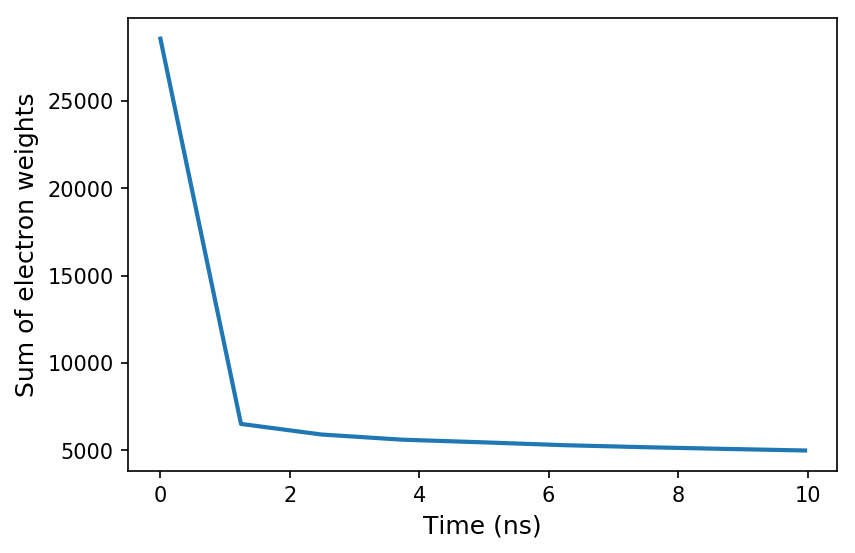

In [91]:
fig = plt.figure(figsize = (6.1,4), dpi = 150); ax = plt.gca()
ax.set_xlabel('Time (ns)')
ax.set_ylabel('Sum of electron weights')
ax.plot(t*1e-3, sum_w)
plt.savefig(savePath + 'electron_decay.svg')
plt.show()